# Übungsblatt 4: Pulse Shaping

In dieser Aufgabe sollen Sie herausfinden, wie Sie das Auseinanderlaufen eines Gauß-Pulses durch Ausnutzen anomaler Dispersion rückgängig machen können.

In [1]:
#Importiere Bibliotheken
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"

Ihr Gauß-Puls ist eine Summe aus Wellen, kontinuierlich um die Zentralfrequenz w0 verteilt. Um numerisch arbeiten zu können, wird das kontinuierliche Spektrum hier diskret dargestellt, in Schrittweiten dw und in einem Bereich (w0-wb,w0+wb) um die Zentralfrequenz herum.

In [2]:
w0 = 5      # Zentralfrequenz
wb = 3      # Grenzen des Spektrums
dw = 0.5    # Schrittweite im Spektrum
c  = 1      # Lichtgeschwindigkeit
PI = 3.1415 # Pi

# komplexer Brechungsindex
pref = 1    # Vorfaktor e^2 N / 2 eps m
damp = 0.5  # Dämpfung gamma

# Reeller Brechungsindex
def refr_index_real(w,W0):
    return 1+pref*(W0*W0-w*w)/((W0*W0-w*w)*(W0*W0-w*w)+damp*damp*w*w)

# Imaginärer Brechungsindex
def refr_index_imag(w,W0):
    return -pref*damp*w*w/((W0*W0-w*w)*(W0*W0-w*w)+damp*damp*w*w)

Plotten Sie den Realteil und Imaginärteil des Brechungsindex für ein beliebiges W0.

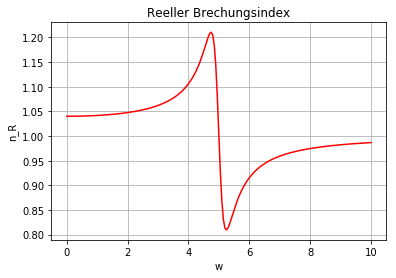

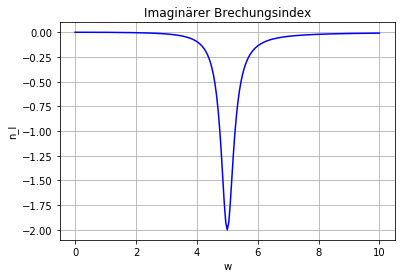

In [3]:
# Generiere Werte
vals = np.linspace(0,10,num=201)

# Wähle W0=5, weil es dann in der Mitte ist
f1 = refr_index_real(vals,5)
f2 = refr_index_imag(vals,5)

# Plotten
plt.plot(vals, f1, 'r')
plt.title('Reeller Brechungsindex')
plt.xlabel('w')
plt.ylabel('n_R')
plt.grid(True)
plt.show()

plt.plot(vals, f2, 'b')
plt.title('Imaginärer Brechungsindex')
plt.xlabel('w')
plt.ylabel('n_I')
plt.grid(True)
plt.show()

Als nächstes definieren wir die Teilwellen des Wellenpakets. Diese wurden über Fouriertransformation des Gauß-Pulses erhalten.

In [4]:
# Gauß-Puls
def gauss(x,t):
    return np.exp(-(t-x)*(t-x))

# Brechungsindex an- und ausschalten
def n_R(InMediumQ, w, W0):
    returnvalue = 1
    if InMediumQ:
        return refr_index_real(w, W0)
    
    return returnvalue

# Brechungsindex ausschalten:
InMediumQ = False

# Eine Komponente der Fouriertransformation mit Frequenz w
def wave(x,t,w, shift):
    return dw/(np.sqrt(2*PI))*np.exp(-(w-w0)*(w-w0)/4)/np.sqrt(2)*np.cos(-shift + w*(t-x/c*n_R(InMediumQ, w,w0)))

# Diskrete Rücktransformation 
def wave_superposition(x,t):
    my_range = np.arange(w0-wb, w0+wb, dw)
    superposition = 0
    for W in my_range:
        superposition += wave(x,t,W,0)
        
    return superposition    

Plotten Sie den Original-Puls (Gauß) sowie die Rekonstruktion durch die Superposition zum Zeitpunkt t=0. Machen Sie sich deutlich, was sich qualitativ ändert, wenn Sie die Parameter (Zentralfrequenz, Schrittweite, maximaler Frequenzbereich der Rücktransformation, Brechungsindex an/aus) ändern.

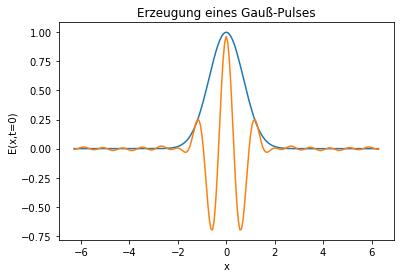

In [5]:
w0 = 5      # Zentralfrequenz
wb = 3      # Grenzen des Spektrums
dw = 0.5    # Schrittweite im Spektrum
c  = 1      # Lichtgeschwindigkeit
PI = 3.1415 # Pi

# komplexer Brechungsindex
pref = 1    # Vorfaktor e^2 N / 2 eps m
damp = 0.5  # Dämpfung gamma

InMediumQ = False

MYPLOT_range = 2*PI        # Parameter für die Plots
MYPLOT_resolution = 1+200  # Auflösung (Sampling) der Plots

plt.plot(np.linspace(-MYPLOT_range, MYPLOT_range, num = MYPLOT_resolution), gauss(np.linspace(-MYPLOT_range, MYPLOT_range, num = MYPLOT_resolution),0))
plt.plot(np.linspace(-MYPLOT_range, MYPLOT_range, num = MYPLOT_resolution), wave_superposition(np.linspace(-MYPLOT_range, MYPLOT_range, num = MYPLOT_resolution),0))
plt.xlabel('x')
plt.ylabel('E(x,t=0)')
plt.title('Erzeugung eines Gauß-Pulses')
plt.show()

Im Folgenden sehen Sie die bekannte Methode, um eine Animation zu erstellen. 

In [6]:
%%capture
# Animation
ANIM_fig=plt.figure()
ANIM_ax=plt.axes(xlim = (-MYPLOT_range, MYPLOT_range), ylim = (-1.2, 1.2))
ANIM_line_A, = ANIM_ax.plot([], [], lw=2)
ANIM_line_B, = ANIM_ax.plot([], [], lw=2)

plt.xlabel('x')
plt.ylabel('E(x)')
plt.title('Ausbreitung des Wellenpakets')

InMediumQ = False
w0 = 5      # Zentralfrequenz
wb = 3      # Grenzen des Spektrums
dw = 0.5    # Schrittweite im Spektrum
c  = 1      # Lichtgeschwindigkeit
PI = 3.1415 # Pi

# komplexer Brechungsindex
pref = 1    # Vorfaktor e^2 N / 2 eps m
damp = 0.5  # Dämpfung gamma

def init():
    ANIM_line_A.set_data([], [])
    ANIM_line_B.set_data([], [])
    return ANIM_line_A, ANIM_line_B

ANIM_frames = 40    # Nr. of frames in the animation
ANIM_speed = .1
def animate(i):
    ANIM_values= np.linspace(-MYPLOT_range, MYPLOT_range, num = MYPLOT_resolution)
    ANIM_line_A.set_data( ANIM_values , wave_superposition( ANIM_values ,(i-0.5*ANIM_frames)*ANIM_speed) )
    ANIM_line_B.set_data(ANIM_values, gauss(ANIM_values, (i-0.5*ANIM_frames)*ANIM_speed))
    return ANIM_line_A, ANIM_line_B

ANIM_animation = animation.FuncAnimation(ANIM_fig, animate, init_func=init, frames=ANIM_frames, interval=20, blit=True)

In [7]:
ANIM_animation

Die Auffächerung des Wellenpakets durch ein dispersiven Medium der Länge length lässt sich als eine lokale Phase beschreiben (W0 ist dabei die Resonanzfrequenz des dispersiven Mediums; w0 bleibt die Zentralfrequenz des Pulses): 

In [8]:
def phase_shift(length, w, W0):
    global InMediumQ 
    InMediumQ = True
    return length*w/c*(refr_index_real(w,W0)-1)

def wave_superposition_dispersed(x,t):
    my_range = np.arange(w0-wb, w0+wb, dw)
    superposition = 0
    for W in my_range:
        superposition += wave(x,t,W,phase_shift(length, W, W0)-phase_shift(length,w0, W0))
        
    return superposition  

W0 = 20

Im Folgenden sehen Sie, wie die Länge des dispersiven Mediums die Form des Gauß-Pulses _hinter_ dem Medium beeinflusst.

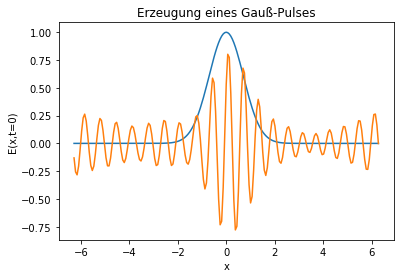

In [9]:
vals = np.linspace(-MYPLOT_range, MYPLOT_range, num=MYPLOT_resolution)

length = 1
pref=1
damp = .1
W0 = 10.5
w0 = 10


plt.plot(vals , gauss(vals ,0))
plt.plot(vals , wave_superposition_dispersed(vals ,0))
plt.xlabel('x')
plt.ylabel('E(x,t=0)')
plt.title('Erzeugung eines Gauß-Pulses')
plt.show()

Nun wollen wir den auseinandergelaufenen Puls wieder zurückfokussieren. Dazu nutzen wir die anomale Dispersion aus.
*Aufgabe*: Versuchen Sie, den Originalpuls so gut es geht wieder herzustellen, indem Sie die Dämpfung (dampC), die Amplitude (prefC) und die Länge (lengthC) des anomalen Mediums anpassen. Welche Resonanzwellenlänge (wC) ist für die Pulskompression im anomalen Medium ideal? Lassen Sie die Werte für die Zentralfrequenz (w0) und für die normale Dispersion (damp, pref, length, W0) 
Die Werte können Sie im Code unten verändern.

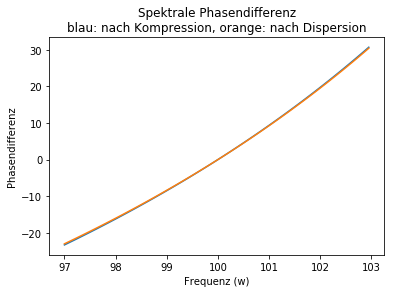

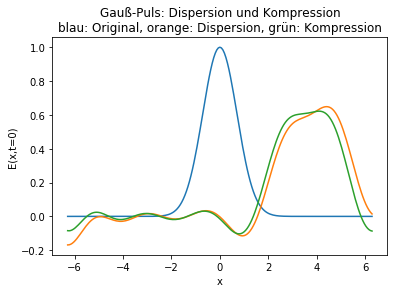

In [10]:
def wave_superposition_compressed(x,t):
    global pref
    global damp
    my_range = np.arange(w0-wb, w0+wb, dw)
    superposition = 0
    my_phase_shift = 0
    prefN=pref
    dampN=damp
    for W in my_range:
        my_phase_shift=0
        pref = prefN
        damp = dampN
        my_phase_shift += phase_shift(length, W, W0)-phase_shift(length,w0, W0)
        pref = prefC
        damp = dampC
        my_phase_shift += phase_shift(lengthC, W, wC)-phase_shift(lengthC,w0, wC)
        superposition += wave(x, t, W, my_phase_shift)
        
    damp = dampN
    pref = prefN
    return superposition

def plot_total_phase_shift():    
    global pref
    global damp
    dw_hires = 0.1*dw
    my_range = np.arange(w0-wb, w0+wb, dw_hires)
    dispersion_only_list=[]
    shifts_list=[]
    
    my_phase_shift = 0
    prefN=pref
    dampN=damp
    for W in my_range:
        my_phase_shift=0
        pref = prefN
        damp = dampN
        my_phase_shift += phase_shift(length, W, W0)-phase_shift(length,w0, W0)
        dispersion_only_list.append(my_phase_shift)
        pref = prefC
        damp = dampC
        my_phase_shift += phase_shift(lengthC, W, wC)-phase_shift(lengthC,w0, wC)
        shifts_list.append(my_phase_shift)
        
    pref = prefN
    damp = dampN
    plt.plot(my_range, shifts_list)
    plt.plot(my_range, dispersion_only_list)
    plt.xlabel('Frequenz (w)')
    plt.ylabel('Phasendifferenz')
    plt.title('Spektrale Phasendifferenz\nblau: nach Kompression, orange: nach Dispersion')
    plt.show()
    return
    
    

w0 = 100
W0 = 120
pref = .1
damp = 1
length = 70000

# zu bestimmende Werte
lengthC = 100000
dampC = 15
prefC = .01
wC = 10

plot_total_phase_shift()

# Plotten
vals = np.linspace(-MYPLOT_range, MYPLOT_range, num=MYPLOT_resolution)

plt.plot(vals , gauss(vals ,0))
plt.plot(vals , wave_superposition_dispersed(vals ,0))
plt.plot(vals , wave_superposition_compressed(vals ,0))
plt.xlabel('x')
plt.ylabel('E(x,t=0)')
plt.title('Gauß-Puls: Dispersion und Kompression\nblau: Original, orange: Dispersion, grün: Kompression')
plt.show()

Nun bauen wir Dämpfung ein. Dadurch können Sie das anomale Medium nicht beliebig lang machen. Versuchen Sie, Parameter zu finden, mit denen Sie den Gauß einigermaßen rekonstruieren können.

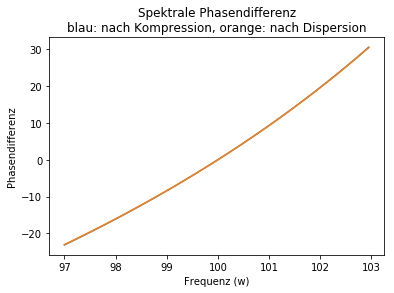

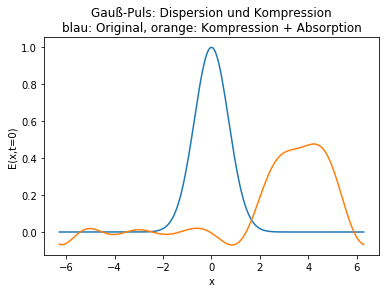

In [11]:
prefC = .027 # Lassen Sie diesen Wert konstant

# zu bestimmende Werte: ÄNDERN SIE DIESE WERTE UM DEN PULS ZU REKONSTRUIEREN
lengthC = 10000
dampC = 10
wC = 10

def wave_superposition_absorbed(x,t):
    global pref
    global damp
    scaling = 0.0003
    my_range = np.arange(w0-wb, w0+wb, dw)
    superposition = 0
    my_phase_shift = 0
    prefN=pref
    dampN=damp
    for W in my_range:
        my_phase_shift=0
        pref = prefN
        damp = dampN
        my_phase_shift += phase_shift(length, W, W0)-phase_shift(length,w0, W0)
        pref = prefC
        damp = dampC
        my_phase_shift += phase_shift(lengthC, W, wC)-phase_shift(lengthC,w0, wC)
        superposition += wave(x, t, W, my_phase_shift)*np.exp(lengthC * scaling* W/c * refr_index_imag(W,wC))*np.exp(length * scaling* W/c * refr_index_imag(W,W0))
        
    damp = dampN
    pref = prefN
    return superposition

plot_total_phase_shift()

vals = np.linspace(-MYPLOT_range, MYPLOT_range, num=MYPLOT_resolution)

plt.plot(vals , gauss(vals ,0))
plt.plot(vals , wave_superposition_absorbed(vals ,0))
plt.xlabel('x')
plt.ylabel('E(x,t=0)')
plt.title('Gauß-Puls: Dispersion und Kompression\nblau: Original, orange: Kompression + Absorption')
plt.show()